In [29]:
#importing the required libraries
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

#dowload the file 
file_id = '16DeG8mBHOMjYZYsuoc1r_7ivwMZf6mOA'
download_url = f'https://drive.google.com/uc?export=download&id={file_id}'
response = requests.get(download_url)
with open('heart_disease_health_indicators_BRFSS2015 2.csv', 'wb') as f:
    f.write(response.content)

# Read the CSV into a DataFrame
health_data = pd.read_csv('heart_disease_health_indicators_BRFSS2015 2.csv')

In [31]:
health_data.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


In [33]:
health_data.info()#getting information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HeartDiseaseorAttack  253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   Diabetes              253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

In [35]:
# Convert appropriate columns to categorical
categorical_cols = [
    'HeartDiseaseorAttack', 'Sex', 'Education', 'Income', 'GenHlth', 'Age',
    'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
    'DiffWalk', 'CholCheck', 'HighBP', 'HighChol', 'Stroke', 'Diabetes'
]

for col in categorical_cols:
    if col in health_data.columns:
        health_data[col] = health_data[col].astype('category')
# Map 'all categories' values
if 'Sex' in health_data.columns:
    health_data['Sex'] = health_data['Sex'].cat.rename_categories({0: 'Female', 1: 'Male'})

if 'Age' in health_data.columns:
    health_data['Age']=health_data['Age'].cat.rename_categories({1: '18-24', 2: '25-29', 3: '30-34', 4: '35-39', 5: '40-44',6: '45-49', 7: '50-54', 8: '55-59', 9: '60-64', 10: '65-69',11: '70-74', 12: '75-79', 13: '80 or older'})
if 'GenHlth' in health_data.columns:
    health_data['GenHlth']=health_data['GenHlth'].cat.rename_categories({ 1: 'excellent', 2: 'very good',  3: 'good', 4: 'fair',   5: 'poor'})
    
if 'Education' in health_data.columns:
    health_data['Education'] = health_data['Education'].cat.rename_categories({1: 'Never attended school or only kindergarten',
    2: 'Elementary',
    3: 'Grades 9 through 11',
    4: 'High school graduate',
    5: 'Some college or technical school',
    6: 'College graduate'})
    
if 'Income' in health_data.columns:
    health_data['Income'] = health_data['Income'].cat.rename_categories({1:'Less than $10',
    2: '$10-$15',
    3: '$15-$20',
    4: '$20-$25',
    5: '25-$35',
    6: '$35-$50',
    7: '$50-$75', 8: '$75 or more'})

In [57]:
health_data.head()#display the first 5 rows

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income (in Thousands)
0,0,1,1,1,40,1,0,0,0,0,1,0,poor,18,15,1,Female,60-64,High school graduate,$15-$20
1,0,0,0,0,25,1,0,0,1,0,0,0,good,0,0,0,Female,50-54,College graduate,Less than $10
2,0,1,1,1,28,0,0,0,0,1,0,0,poor,30,30,1,Female,60-64,High school graduate,$75 or more
3,0,1,0,1,27,0,0,0,1,1,1,0,very good,0,0,0,Female,70-74,Grades 9 through 11,$35-$50
4,0,1,1,1,24,0,0,0,1,1,1,0,very good,3,0,0,Female,70-74,Some college or technical school,$20-$25


In [ ]:
#drop irrelevant columns
columns_to_drop = ['AnyHealthcare', 'NoDocbcCost']         
health_data = health_data.drop(columns=columns_to_drop)

In [13]:
health_data.info()#datatype of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   HeartDiseaseorAttack  253680 non-null  category
 1   HighBP                253680 non-null  category
 2   HighChol              253680 non-null  category
 3   CholCheck             253680 non-null  category
 4   BMI                   253680 non-null  int64   
 5   Smoker                253680 non-null  category
 6   Stroke                253680 non-null  category
 7   Diabetes              253680 non-null  category
 8   PhysActivity          253680 non-null  category
 9   Fruits                253680 non-null  category
 10  Veggies               253680 non-null  category
 11  HvyAlcoholConsump     253680 non-null  category
 12  GenHlth               253680 non-null  category
 13  MentHlth              253680 non-null  int64   
 14  PhysHlth              253680 non-nul

In [15]:
#statistcial sumamry
health_data.describe()

,BMI,MentHlth,PhysHlth
count,253680.000000,253680.000000,253680.000000
mean,28.382364,3.184772,4.242081
std,6.608694,7.412847,8.717951
min,12.000000,0.000000,0.000000
25%,24.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000
75%,31.000000,2.000000,3.000000
max,98.000000,30.000000,30.000000


The average BMI is 28.38, which falls into the overweight category
The mean is 3.18 days, but the median is 0, meaning over half the respondents reported no poor mental health days in the past month.Howerver std of 7.4 indicates high variation among individuals.


In [17]:
#check data types
health_data.dtypes

HeartDiseaseorAttack    category
HighBP                  category
HighChol                category
CholCheck               category
BMI                        int64
Smoker                  category
Stroke                  category
Diabetes                category
PhysActivity            category
Fruits                  category
Veggies                 category
HvyAlcoholConsump       category
GenHlth                 category
MentHlth                   int64
PhysHlth                   int64
DiffWalk                category
Sex                     category
Age                     category
Education               category
Income                  category
dtype: object

In [41]:
#check for duplicates
health_data.duplicated().sum()

25199

In [43]:
#drop the duplicated rows
health_data.drop_duplicates(inplace=True)

In [47]:
#change the column name of income to Income (in Thousands)
health_data.rename(columns={'Income': 'Income (in Thousands)'}, inplace=True)

In [23]:
health_data.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income (in Thousands)
0,0,1,1,1,40,1,0,0,0,0,1,0,poor,18,15,1,Female,60-64,High school graduate,$15-$20
1,0,0,0,0,25,1,0,0,1,0,0,0,good,0,0,0,Female,50-54,College graduate,Less than $10
2,0,1,1,1,28,0,0,0,0,1,0,0,poor,30,30,1,Female,60-64,High school graduate,$75 or more
3,0,1,0,1,27,0,0,0,1,1,1,0,very good,0,0,0,Female,70-74,Grades 9 through 11,$35-$50
4,0,1,1,1,24,0,0,0,1,1,1,0,very good,3,0,0,Female,70-74,Some college or technical school,$20-$25


In [49]:
#final check 
health_data.duplicated().sum()

0

In [44]:
health_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 228481 entries, 0 to 253679
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   HeartDiseaseorAttack   228481 non-null  category
 1   HighBP                 228481 non-null  category
 2   HighChol               228481 non-null  category
 3   CholCheck              228481 non-null  category
 4   BMI                    228481 non-null  int64   
 5   Smoker                 228481 non-null  category
 6   Stroke                 228481 non-null  category
 7   Diabetes               228481 non-null  category
 8   PhysActivity           228481 non-null  category
 9   Fruits                 228481 non-null  category
 10  Veggies                228481 non-null  category
 11  HvyAlcoholConsump      228481 non-null  category
 12  GenHlth                228481 non-null  category
 13  MentHlth               228481 non-null  int64   
 14  PhysHlth               22

In [46]:
#univariate analysis


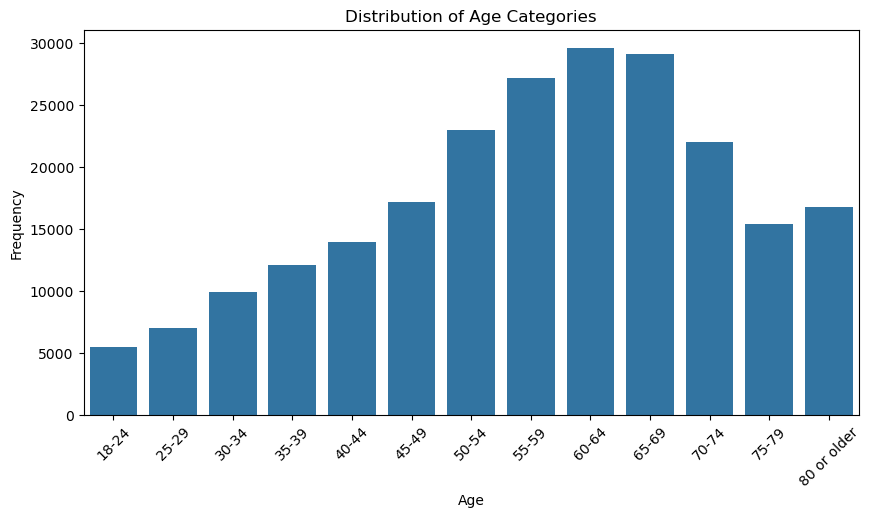

In [48]:
#  bar Plotting distribution for Age
plt.figure(figsize=(10, 5))
sns.countplot(data=health_data, x='Age', order=health_data['Age'].cat.categories)
plt.title('Distribution of Age Categories')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.show()

Majority of respondents fall into the older age brackets (60–69 years)and (80+), suggesting an age-skewed population.

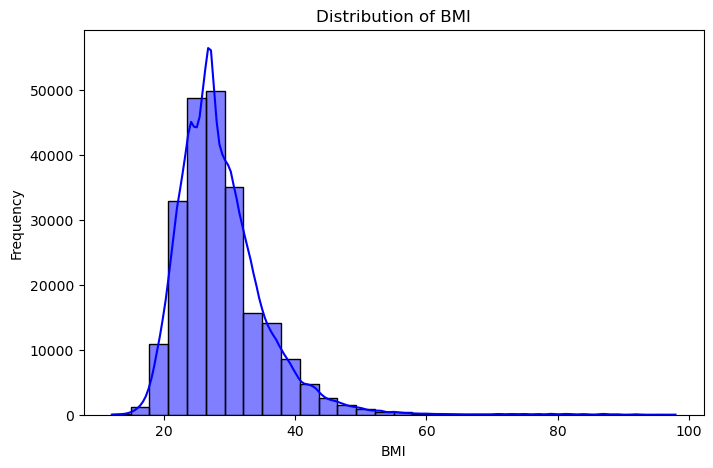

In [150]:
# BMI - histogram
plt.figure(figsize=(8, 5))
sns.histplot(data=health_data, x='BMI', bins=30,color='blue', kde=True)
plt.title('Distribution of BMI')
plt.ylabel('Frequency')
plt.show()

The BMI values are right-skewed, peaking around the 25–30 range, which corresponds to overweight.

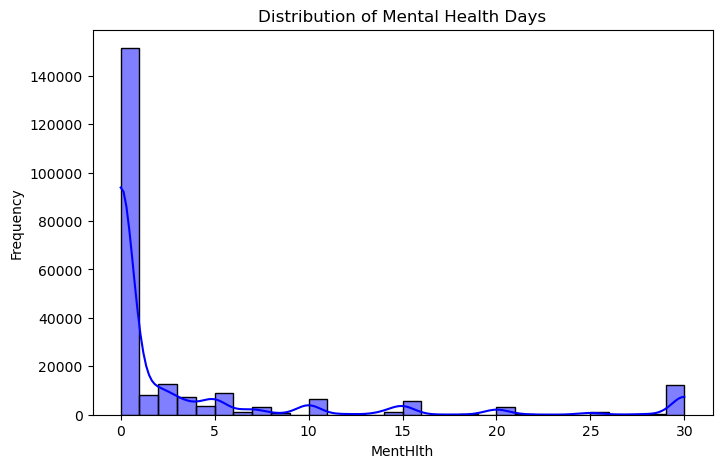

In [106]:
# MentHlth - histogram
plt.figure(figsize=(8, 5))
sns.histplot(data=health_data, x='MentHlth', bins=30,color='blue', kde=True)
plt.title('Distribution of Mental Health Days')
plt.ylabel('Frequency')
plt.show()


Mental health challenges are present in a small subset of the population but should not be overlooked.

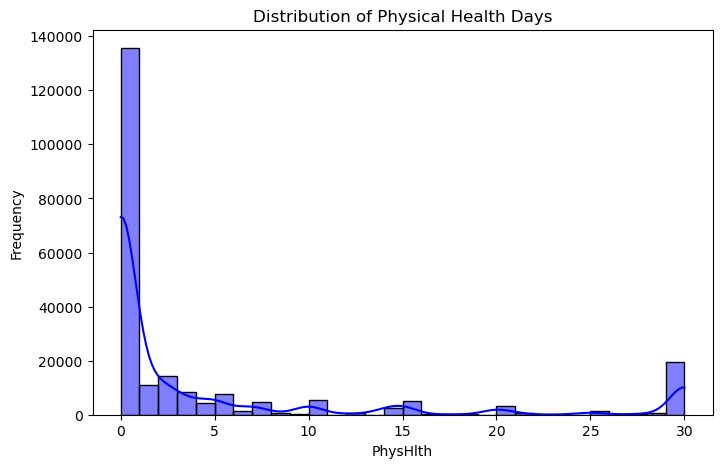

In [112]:
# PhysHlth - histogram
plt.figure(figsize=(8, 5))
sns.histplot(data=health_data, x='PhysHlth', bins=30,color='blue', kde=True)
plt.title('Distribution of Physical Health Days')
plt.ylabel('Frequency')
plt.show()

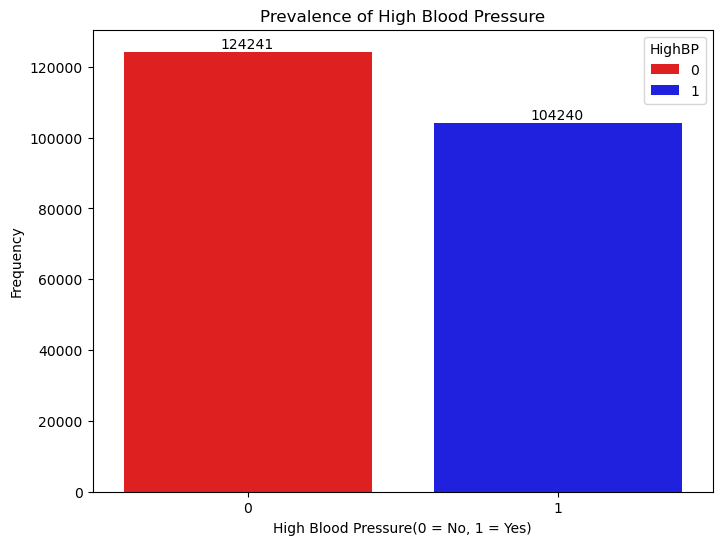

In [62]:
# 2. Investigate Prevalence of Health Conditions

# Plotting Prevalence of High Blood Pressure
plt.figure(figsize=(8, 6))
count=sns.countplot(x='HighBP',hue='HighBP', data=health_data, palette=['Red','blue'])
for container in count.containers:# for displaying the count
    count.bar_label(container)
#bar plotting
plt.title('Prevalence of High Blood Pressure')
plt.xlabel('High Blood Pressure(0 = No, 1 = Yes)')
plt.ylabel('Frequency')
plt.show()

45.6% of total responders are suffering from high blood pressure.

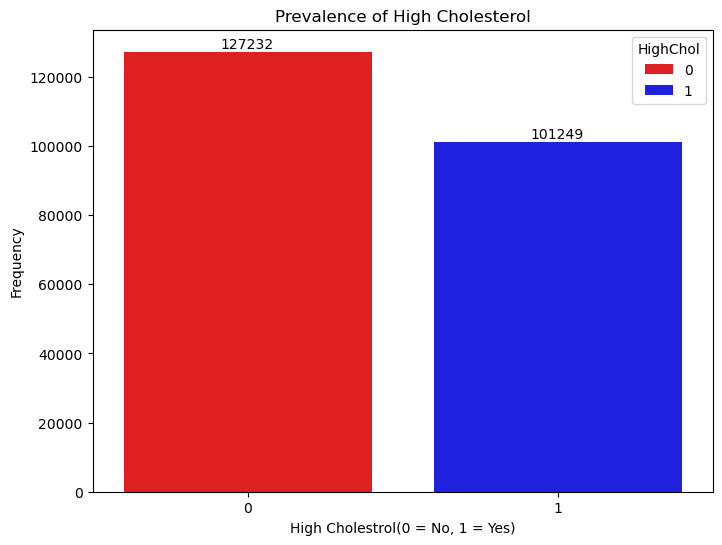

In [64]:
#bar  Plotting Prevalence of High Cholesterol
plt.figure(figsize=(8, 6))
count=sns.countplot(x='HighChol',hue='HighChol', data=health_data, palette=['Red','blue'],legend=True)
for container in count.containers:# for displaying the count
    count.bar_label(container)
plt.title('Prevalence of High Cholesterol')
plt.xlabel('High Cholestrol(0 = No, 1 = Yes)')
plt.ylabel('Frequency')
plt.show()

44% of total responders are suffering from high cholestrol.

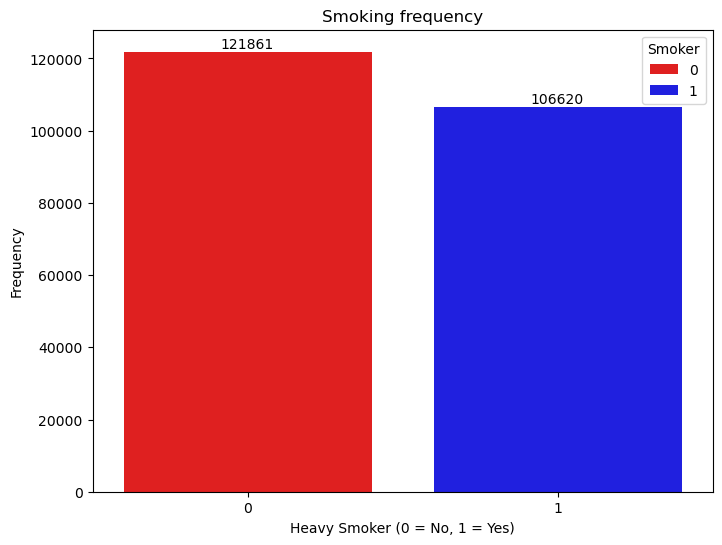

In [66]:
# Plotting Prevalence of Heavy Smoker
plt.figure(figsize=(8, 6))
count=sns.countplot(x='Smoker',hue='Smoker', data=health_data, palette=['Red','blue'],legend=True)
for container in count.containers:# for displaying the count
    count.bar_label(container)
plt.title('Smoking frequency')
plt.xlabel('Heavy Smoker (0 = No, 1 = Yes)')
plt.ylabel('Frequency')
plt.show()

Among the responders ,46% are heavy smokers.

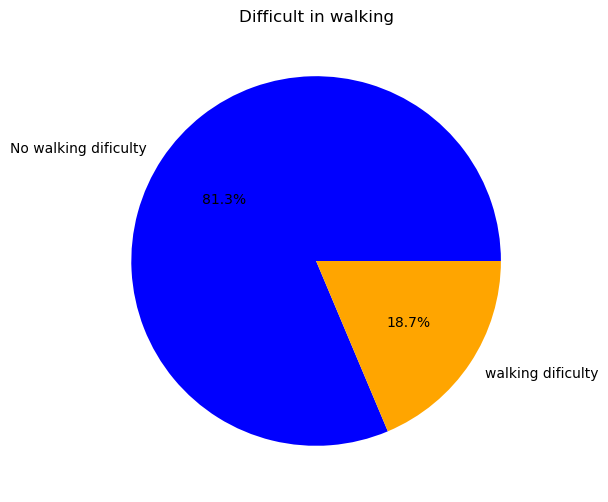

In [160]:
#  pie chart Plotting Prevalence of difficulty in walking

diffwalk_counts = health_data['DiffWalk'].value_counts()
labels = ['No walking dificulty', 'walking dificulty']
plt.title('walking Diffuclty')
plt.pie(diffwalk_counts, labels=labels, autopct='%1.1f%%', colors=['blue','orange'])
plt.show()



Among the responders,18.7% of people suffering from difficult in walking.

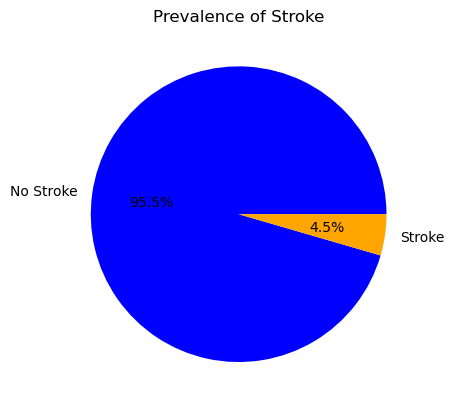

In [158]:
#Plotting Prevalence of Stroke
#plt.figure(figsize=(8, 6))
stroke_counts = health_data['Stroke'].value_counts()
labels = ['No Stroke', 'Stroke']
plt.pie(stroke_counts, labels=labels, autopct='%1.1f%%', colors=['blue','orange'])
plt.title('Prevalence of Stroke')
plt.show()

Among the 121861 responders,only 4.5% of people suffering from stroke.

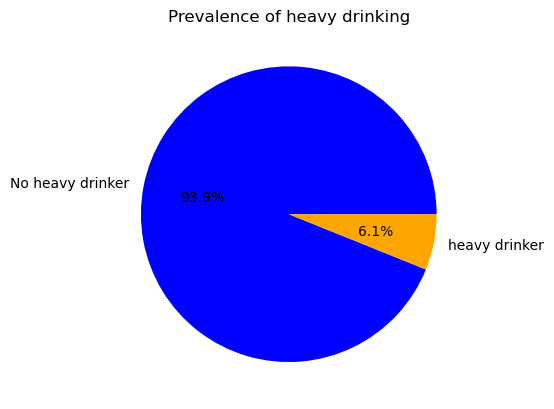

In [51]:
#alocohol consumption
consumption_counts = health_data['HvyAlcoholConsump'].value_counts()
labels = ['No heavy drinker', 'heavy drinker']
#pie chart
plt.pie(consumption_counts, labels=labels, autopct='%1.1f%%', colors=['blue','orange'])
plt.title('Prevalence of heavy drinking')
plt.show()

only 6% of people are heavy drinkers which indicates that we need more clarification whether drinking has effect on heart disease.

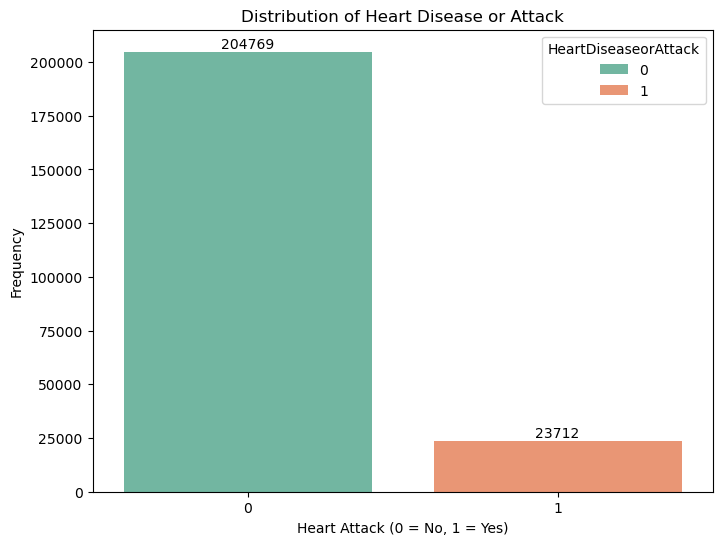

In [50]:
# 3. Analyze Distribution of Heart Disease (Target Variable)

# Plotting Distribution of Heart Disease or Attack
plt.figure(figsize=(8, 6))
count=sns.countplot(x='HeartDiseaseorAttack', hue='HeartDiseaseorAttack',data=health_data, palette='Set2')
for container in count.containers:# for displaying the count
    count.bar_label(container)
plt.title('Distribution of Heart Disease or Attack')
plt.xlabel('Heart Attack (0 = No, 1 = Yes)')
plt.ylabel('Frequency')
plt.show()


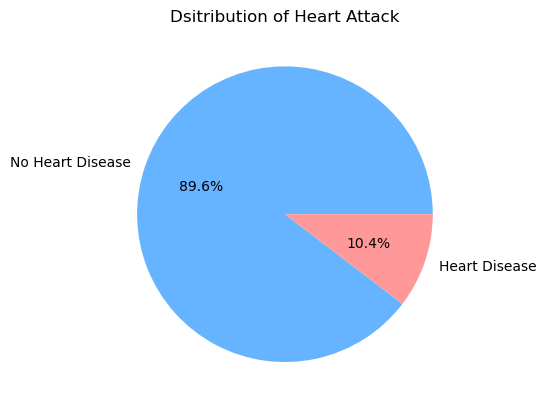

In [182]:
#pie chart for Distribution of Heart Disease 
heart_disease_counts = health_data['HeartDiseaseorAttack'].value_counts()
labels = ['No Heart Disease', 'Heart Disease']

# Plotting the pie chart with percentage 
plt.pie(heart_disease_counts, labels=labels,autopct='%1.1f%%', colors=['#66b3ff', '#ff9999'])
plt.title('Dsitribution of Heart Attack')
plt.show()

Overall 10.4% of people are suffering from heart disease or heart attack.This indicates that  approximately 1 in 10 individuals in the dataset has been diagnosed with heart disease or a history of heart attack.

In [ ]:
#bivariate analysis

In [53]:
# Filter to include only people with heart disease
heart_patients = health_data[health_data['HeartDiseaseorAttack'] == 1]

In [55]:
# Filter to include only people without heart disease
not_heart_patients = health_data[health_data['HeartDiseaseorAttack'] == 0]

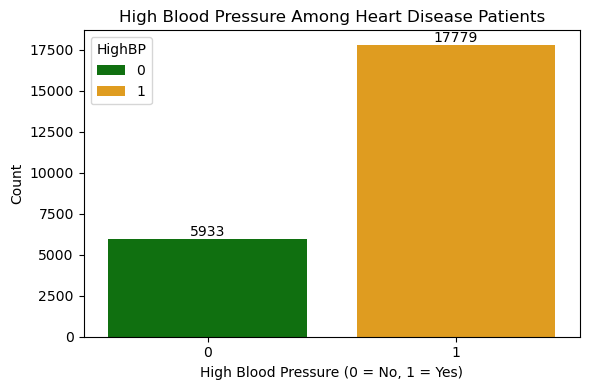

In [220]:
# Comparing HighBP vs HeartDisease or Attack
plt.figure(figsize=(6, 4))
count=sns.countplot(x='HighBP',hue='HighBP', data=heart_patients, palette=['green','orange'])
for container in count.containers:# for displaying the count
    count.bar_label(container)
plt.title('High Blood Pressure Among Heart Disease Patients')
plt.xlabel('High Blood Pressure (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Among heart disease patients of 23,712,74% of people has high blood pressure.

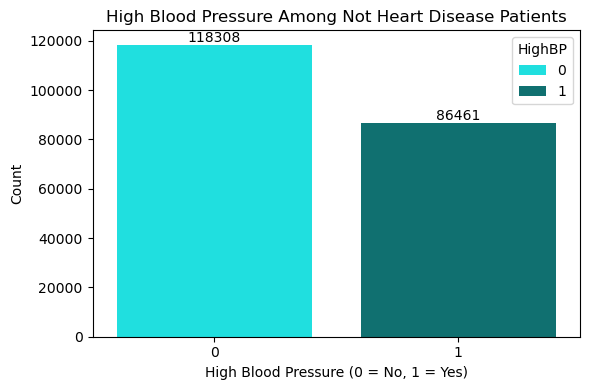

In [228]:
# Comparing HighBP vs Not Heart patient
plt.figure(figsize=(6, 4))
count=sns.countplot(x='HighBP',hue='HighBP', data=not_heart_patients, palette=['Cyan','Teal'])
for container in count.containers:# for displaying the count
    count.bar_label(container)
plt.title('High Blood Pressure Among Non- Heart Disease Patients')
plt.xlabel('High Blood Pressure (0 = No, 1 = Yes)')#labelling x axis
plt.ylabel('Count')#labeling y axis
plt.tight_layout()
plt.show()

Among non-heart disease poeple of 204,769,42% of people have high blood pressure,indicates that they need proper checkup and to maintain the blood pressure ,otehr wise leads to heart attack.

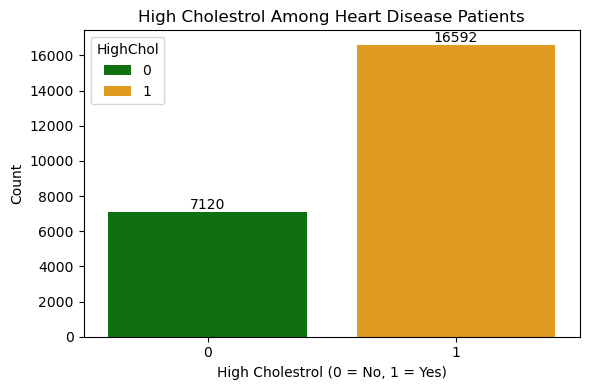

In [232]:
#Analyze HighChol within Heart Disease Patients
plt.figure(figsize=(6, 4))
count=sns.countplot(x='HighChol',hue='HighChol', data=heart_patients, palette=['green','orange'])
for container in count.containers:# for displaying the count
    count.bar_label(container)
plt.title('High Cholestrol Among Heart Disease Patients')
plt.xlabel('High Cholestrol (0 = No, 1 = Yes)')#labelling x axis
plt.ylabel('Count')#labelling y axis
plt.tight_layout()
plt.show()

With heart disease patients,around 70% of people is suffering from high cholestrol.

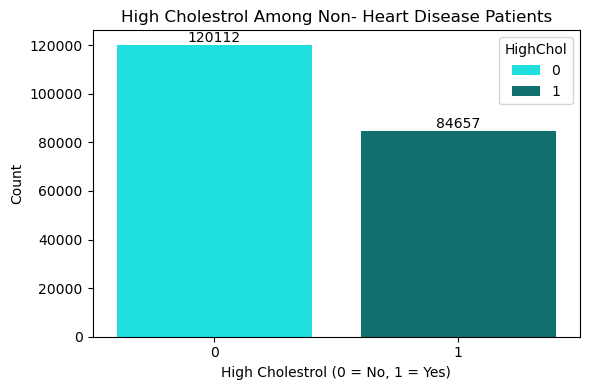

In [74]:
#Comapring HighChol within  Non Heart Disease Patients
plt.figure(figsize=(6, 4))
count=sns.countplot(x='HighChol',hue='HighChol', data=not_heart_patients, palette=['Cyan','Teal'])
for container in count.containers:# for displaying the count
    count.bar_label(container)
plt.title('High Cholestrol Among Non- Heart Disease Patients')
plt.xlabel('High Cholestrol (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Among non-heart patients,41% of patients has suffering from high cholestrol.

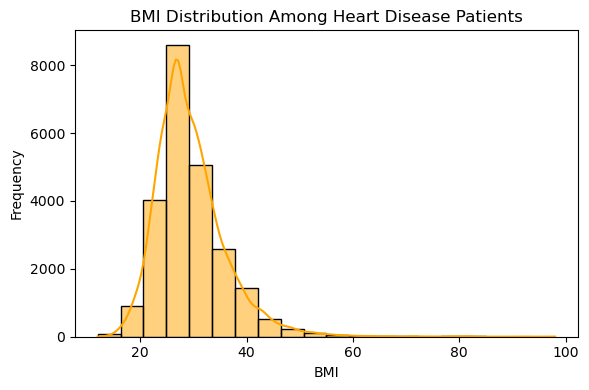

In [242]:
#Analyze BMI within Heart Disease Patients
plt.figure(figsize=(6, 4))
sns.histplot(heart_patients['BMI'], kde=True, bins=20, color='orange')
plt.title('BMI Distribution Among Heart Disease Patients')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

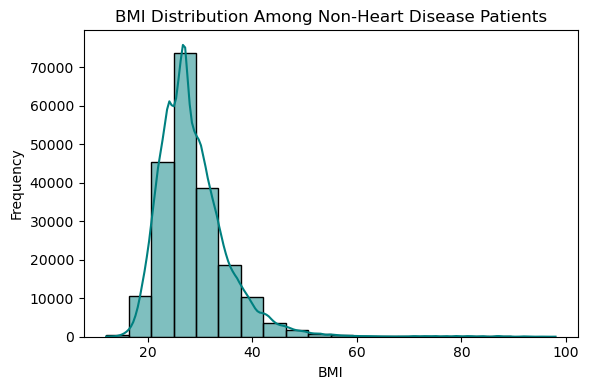

In [246]:
#Analyze BMI within Non  Heart Disease Patients
#ploting histogram
plt.figure(figsize=(6, 4))
sns.histplot(not_heart_patients['BMI'], kde=True, bins=20, color='Teal')
plt.title('BMI Distribution Among Non-Heart Disease Patients')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Among both heart patient and non-heart disease patient,most of the patients average BMI around 28 which needs to have more deeper analysis ,by understanding their weight and height.

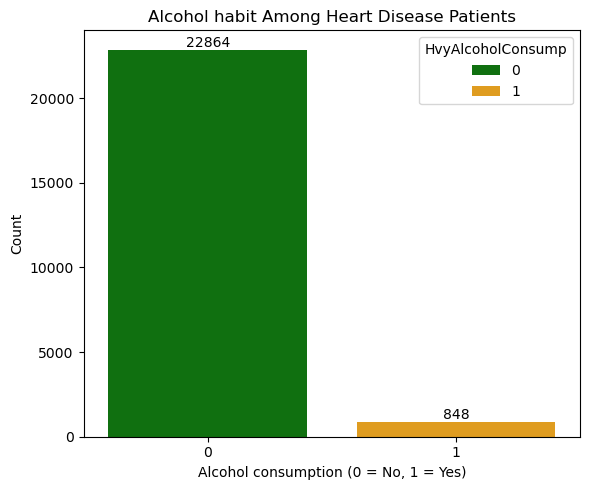

In [276]:
#Analyze Alcohol consumption within  Heart Disease Patients
plt.figure(figsize=(6, 5))
count=sns.countplot(x='HvyAlcoholConsump',hue='HvyAlcoholConsump', data=heart_patients, palette=['green','orange'])
for container in count.containers:# for displaying the count
    count.bar_label(container)
plt.title('Alcohol habit Among Heart Disease Patients')
plt.xlabel('Alcohol consumption (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

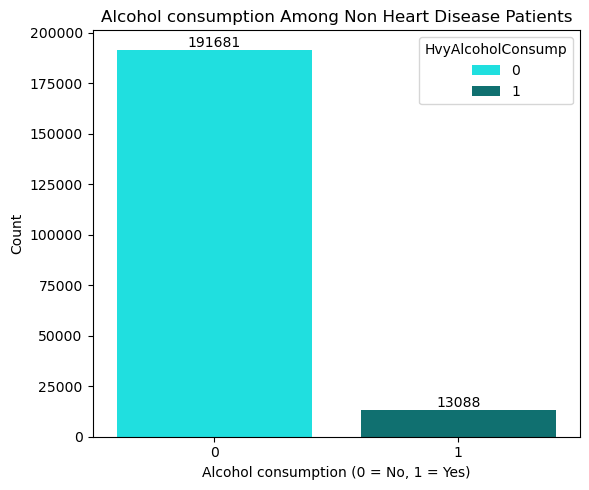

In [278]:
#Analyze Alcohol consumption within Non  Heart Disease Patients
plt.figure(figsize=(6, 5))
count=sns.countplot(x='HvyAlcoholConsump',hue='HvyAlcoholConsump', data=not_heart_patients, palette=['Cyan','Teal'])
for container in count.containers:# for displaying the count
    count.bar_label(container)
plt.title('Alcohol consumption Among Non Heart Disease Patients')
plt.xlabel('Alcohol consumption (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

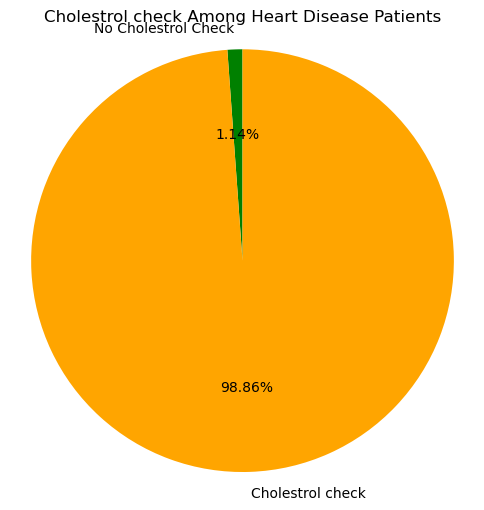

In [264]:
#Anlaysing person with heart disease has checked cholestrol or not
colcheck_counts = heart_patients['CholCheck'].value_counts().sort_index()
labels = ['No Cholestrol Check', 'Cholestrol check']
colors = ['green','orange']

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(colcheck_counts, labels=labels, colors=colors, autopct='%1.2f%%', startangle=90)
plt.title('Cholestrol check Among Heart Disease Patients')
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular
plt.show()

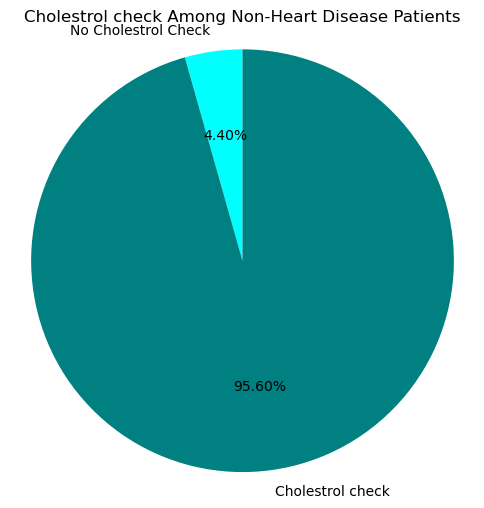

In [268]:
#Anlaysing person not having heart disease has checked cholestrol or not
colcheck_counts = not_heart_patients['CholCheck'].value_counts().sort_index()
labels = ['No Cholestrol Check', 'Cholestrol check']
colors = ['Cyan','Teal']

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(colcheck_counts, labels=labels, colors=colors, autopct='%1.2f%%', startangle=90)
plt.title('Cholestrol check Among Non-Heart Disease Patients')
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular
plt.show()

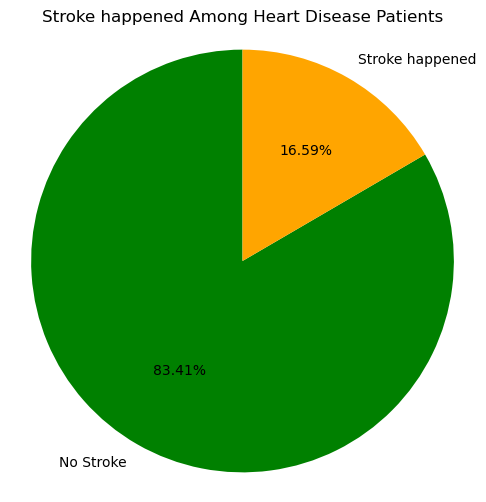

In [270]:
#analysing stroke happened for Heart disease patients
stroke_counts = heart_patients['Stroke'].value_counts().sort_index()
labels = ['No Stroke', 'Stroke happened']
colors = ['green','orange']

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(stroke_counts, labels=labels, colors=colors, autopct='%1.2f%%', startangle=90)
plt.title('Stroke happened Among Heart Disease Patients')
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular
plt.show()

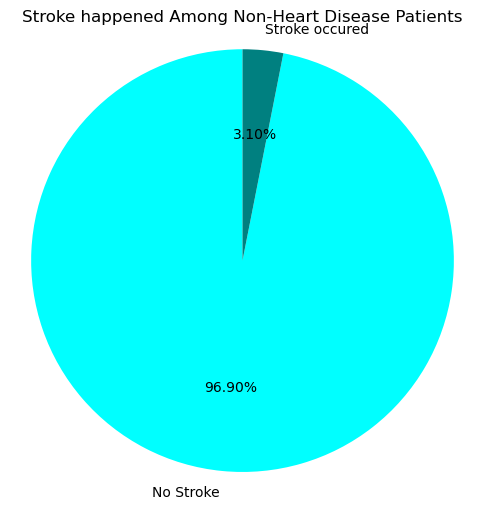

In [274]:
#analysing stroke happened for Non- Heart disease patients
stroke_counts = not_heart_patients['Stroke'].value_counts().sort_index()
labels = ['No Stroke', 'Stroke occured']
colors = ['Cyan','Teal']

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(stroke_counts, labels=labels, colors=colors, autopct='%1.2f%%', startangle=90)
plt.title('Stroke happened Among Non-Heart Disease Patients')
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular
plt.show()

Among individuals with heart disease, 16.6% report having suffered a stroke, compared to just 3.1% among those without heart disease.

In [308]:
# Calculating correlation matrix for continuous variables
corr_vars = ['HeartDiseaseorAttack', 'BMI', 'MentHlth', 'PhysHlth']
corr_matrix = health_data[corr_vars].corr()#computing the correlation

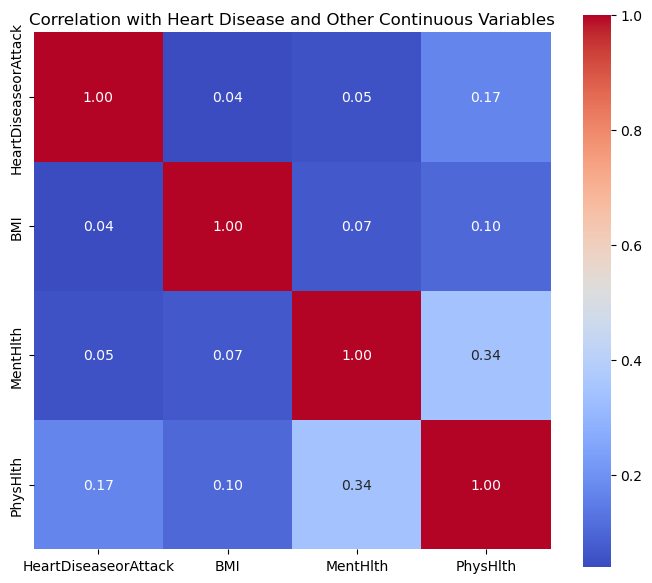

In [310]:

# Plot heatmap
plt.figure(figsize=(7, 6))#size of the chart
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation with Heart Disease and Other Continuous Variables')
plt.tight_layout()
plt.show()

The findings support that poor physical health days are the most aligned with heart disease prevalence among continuous variables.

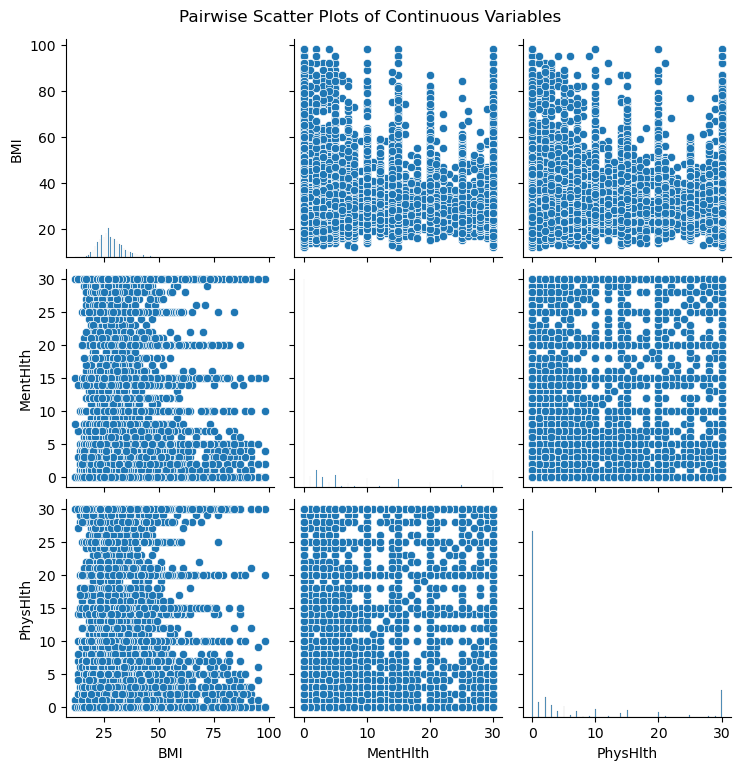

In [313]:
sns.pairplot(health_data[corr_vars])
plt.suptitle('Pairwise Scatter Plots of Continuous Variables', y=1.02)
plt.show()

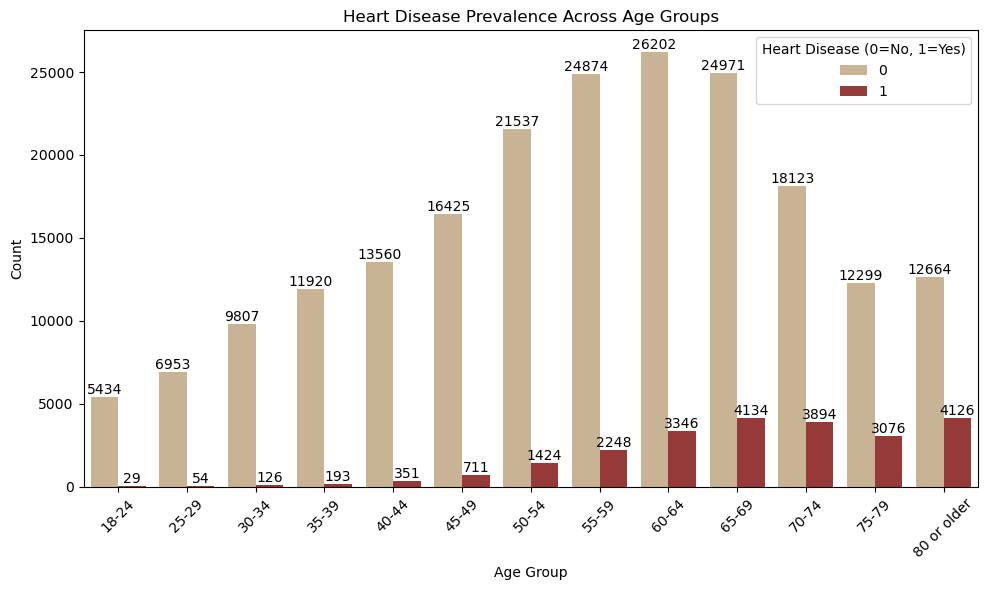

In [76]:
#Compare Heart Disease Across Demographic Groups:
#Heart Disease by Age Group
plt.figure(figsize=(10, 6))
count=sns.countplot(data=health_data, x='Age', hue='HeartDiseaseorAttack', palette=['tan','brown'])
for container in count.containers:# for displaying the count
    count.bar_label(container)
plt.title('Heart Disease Prevalence Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Heart Disease (0=No, 1=Yes)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Heart disease prevalence increases with age.The highest cases are seen in the 60–74 age range and 80+.

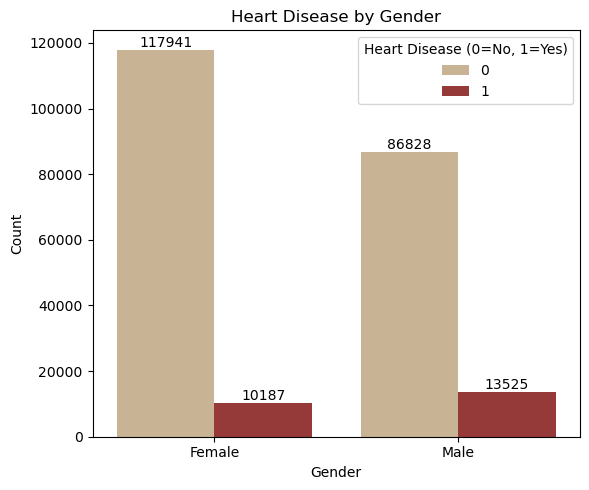

In [335]:
#heart disease by gender
plt.figure(figsize=(6, 5))
count=sns.countplot(data=health_data, x='Sex', hue='HeartDiseaseorAttack', palette=['tan','brown'])
for container in count.containers:# for displaying the count
    count.bar_label(container)
plt.title('Heart Disease by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Heart Disease (0=No, 1=Yes)')
plt.tight_layout()
plt.show()

Males have a significantly higher prevalence of heart disease (13.5%) compared to females (8.0%).


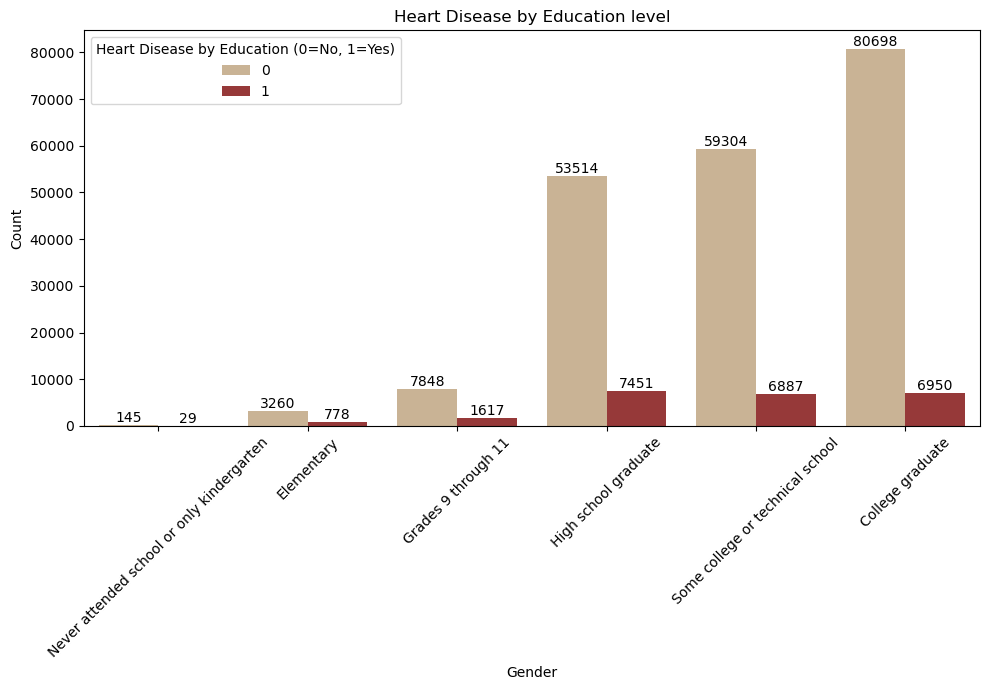

In [375]:
#Heart disease by Education
plt.figure(figsize=(10, 7))
count=sns.countplot(data=health_data, x='Education', hue='HeartDiseaseorAttack', palette=['tan','brown'])
for container in count.containers:# for displaying the count
    count.bar_label(container)
# Adding title and labels
plt.title('Heart Disease by Education level')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)# Rotating x-axis labels for better readability
plt.legend(title='Heart Disease by Education (0=No, 1=Yes)')
plt.tight_layout()
plt.show()

People with less education is more prone to heart diesease.people with education below 11 grade are more affected by heart diesease.This may be due to lack of awareness.

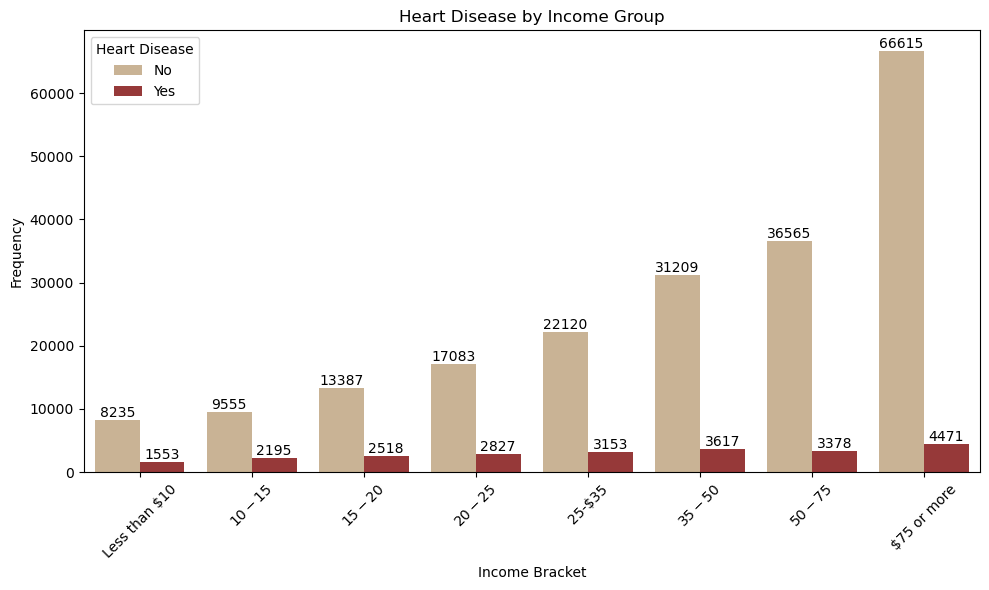

In [391]:
#Heart Disease by Income level
# Creating the count plot
plt.figure(figsize=(10, 6))
count=sns.countplot(data=health_data, x='Income (in Thousands)', hue='HeartDiseaseorAttack', palette=['tan','brown'])
# Adding title and labels
plt.title('Heart Disease by Income Group')
plt.xlabel('Income Bracket')
plt.ylabel('Frequency')
# Rotating x-axis labels for better readability
plt.xticks(rotation=45)
for container in count.containers:# for displaying the count
    count.bar_label(container)
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

There is a clear inverse relationship between income and heart disease prevalence. Individuals in lower income brackets show significantly higher rates of heart disease. 